check czt

In [26]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
evta = "/Users/swasti/code/beamtest/run22-15MeV/beam-original/cud_combined.evta"

In [3]:
with open(evta) as f:
    contents = f.readlines()

In [6]:
for i in range(400):
    line = contents[i]

    if not line.isspace():
        if (line.find('SE') >= 0):
            
            #ET Line
            line = contents[i+1]
            et = line.split()[1]
            
            i+=1

            line = contents[i+1]

            i+=1
            
            curid = line.split()[1] #next line to SE is is the ID.
            

In [41]:
czt_h5 = "/Users/swasti/code/beamtest/run22-15MeV/2022-04-28_CZT_run22-000_redo_cal__L2.h5"

In [42]:
czt = h5py.File(czt_h5,'r')

In [43]:
czt['CZT/BadPadflag'].shape

(972318, 16, 16)

In [44]:
czt_pos = czt['CZT/Position'][...]
czt_pos.shape

(972318, 16, 16, 3)

In [45]:
cztid = czt['CZT/EventID'][...]
cztid.shape

(972318,)

In [51]:
np.where(cztid == 2148236535)

(array([20]),)

In [55]:
cztnrg=czt['CZT/Energy'][...]

In [56]:
bpd = czt['CZT/BadPadflag'][...]
[evt, a, b] = bpd.shape
zpos = []
for i in range(200000):
    if i % 10000 ==0:
        print(i)
    
    if cztid[i] == 0:
        continue
        
    for j in range(a):
        for k in range(b):
            if cztnrg[i,j,k] >1:
                if bpd[i,j,k] == False:
                    zpos.append(czt_pos[i,j,k,2])
    

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


(array([ 16310.,   1284.,   1309.,   1353.,   1329.,   1295.,   1395.,
          1471.,   1497.,   1704.,   1883.,   2157.,   2345.,   2576.,
          2555.,   2596.,   2585.,   2609.,   2562.,   2531.,   2539.,
          2529.,   2603.,   2674.,   2475.,   2252.,   2152.,   1907.,
          2130.,   1879.,   1845.,   1758.,   1752.,   1847.,   1750.,
          1654.,   1594.,   1604.,   1558.,   1784.,   1512.,   1629.,
          1609.,   1619.,   1479.,   1582.,   1554.,   1591.,   1477.,
          1528.,   1389.,   1443.,   1656.,   1308.,   1476.,   1390.,
          1590.,   1324.,   1425.,   1396.,   1417.,   1332.,   1328.,
          1335.,   1286.,   1423.,   1386.,   1350.,   1229.,   1465.,
          1588.,   1266.,   1193.,   1246.,   1249.,   1297.,   1284.,
          1258.,   1571.,   1420.,   1288.,   1284.,   1232.,   1230.,
          1359.,   1235.,   1292.,   1278.,   1643.,   1382.,   1415.,
          1318.,   1223.,   1414.,   1461.,   1410.,   1325.,   1538.,
      

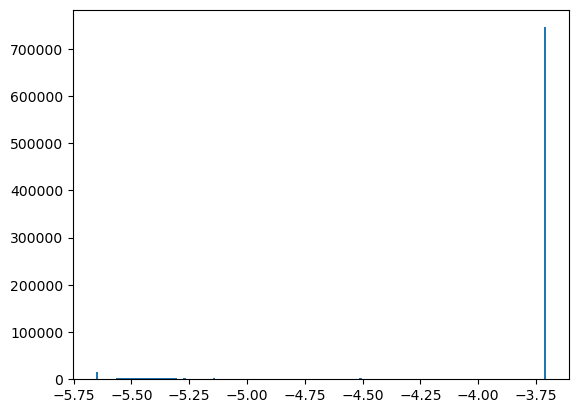

In [57]:
plt.hist(np.array(zpos), bins = 200)

In [ ]:
[c,a,b] = czt_ene_arr.shape
    
    for ihit in np.arange(c):
        for block in np.arange(a):
            for bar in np.arange(b):
                if czt_ene_arr[ihit, block, bar] > CZT_SOFT_THRS:
                    if bpf_arr[ihit,block,bar] == False:
                        ene = czt_ene_arr[ihit, block, bar]
                        
                        hit_x = czt_pos_arr[ihit, block,bar,0]
                        hit_y = czt_pos_arr[ihit, block,bar,1]
                        hit_z = czt_pos_arr[ihit, block,bar,2]
                        
                        hit_czt_ene.append(float(ene))
                        hit_czt_xpos.append(float(hit_x))
                        hit_czt_ypos.append(float(hit_y))
                        hit_czt_zpos.append(float(hit_z))